In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#está dando errado se tentar pegar as imagens do path images
files_path = [os.path.abspath(x) for x in os.listdir("./images/img400x_recorte_horizontal") if x.endswith('.png')]
print(files_path)

['/Users/wesleyaraujo/Documents/git/visaocomp/img400x_2.png', '/Users/wesleyaraujo/Documents/git/visaocomp/img400x_3.png', '/Users/wesleyaraujo/Documents/git/visaocomp/img400x_1.png']


img400x_2.png


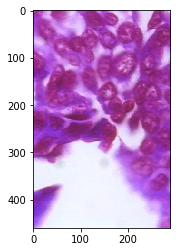

img400x_3.png


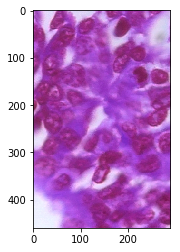

img400x_1.png


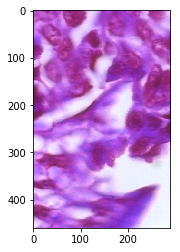

In [4]:
# diretorio, arquivo = path, filename = os.path.split(files_path[0])
# print(arquivo)
# img = cv2.imread(arquivo)
# plt.imshow(img)
# plt.show()
images = []
for i in files_path:
    diretorio, arquivo = path, filename = os.path.split(i)
    print(arquivo)
    img = cv2.imread(arquivo)
    images.append(img)
    plt.imshow(img)
    plt.show()
    


In [5]:
# Demora muito tempo para imagens menores que 400x
stitcher = cv2.createStitcher()
status, stitched = stitcher.stitch(images)
print(status)

0


# Algoritmo stitcher do opencv

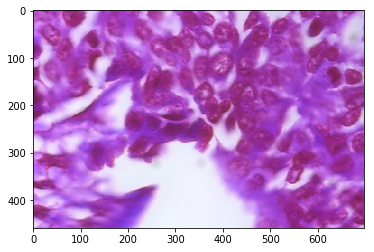

In [6]:
cv2.imwrite("output.png", stitched)
plt.imshow(stitched)
plt.show()

# ORB keypoints

496


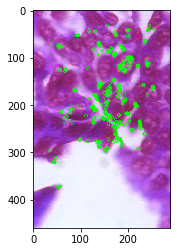

495


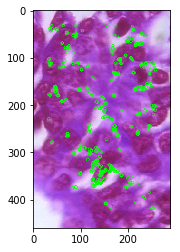

458


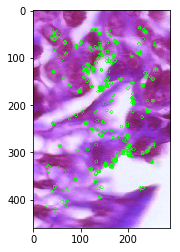

In [7]:
# cv2.drawKeypoints está com erro em opencv 4.x, utilizar versão 3.4.5.20
for i in files_path:
    diretorio, arquivo = path, filename = os.path.split(i)
    img = cv2.imread(arquivo)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(img, None)
    img2 = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0), flags=0)
#     img = cv2.drawKeypoints(img, keypoints, None)
    print(len(descriptors))
    plt.imshow(img2)
    plt.show()

# SURF Keypoints

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'